# Installing needed software

Modern scientific research often either requires or can greatly benefit from the use of computational tools. Even if you're not on the cutting edge, you can make your life better and easier using these tools to conduct and share your research. The goal here is to give a brief overview of the tools we'll be using in this course and how to install them along with other tools on your system:

* Installing **Python** and the **SciPy stack**
* Installing **R**, **RStudio** and additional packages
* Installing **TeX** via **TeX Live** and **Pandoc**

### Download the course materials from GitHub to your desktop: 

https://github.com/IRCS-analysis-mini-courses/reproducible-research

A few notes before we dive in.

**First**, these instructions are oriented towards Unix-like operating systems (i.e. Linux, Mac OS X). If you are running Windows, strongly consider installing a few things to follow along for the first day of the course. [Cygwin](https://www.cygwin.com/) is a linux-like environment where you can use linux commands. It is also possible to create a [linux partition](http://www.everydaylinuxuser.com/2014/05/install-ubuntu-1404-alongside-windows.html) on your hard drive, which will allow you to keep Windows and get the benefits of a linux distribution. Most notably, a package manager makes everything below extremely easy.

**Second**, the location of files may vary across operating systems. We'll show you how to determine these locations, but keep in mind where the relevant locations are for your operating system. 

**Third**, some of the cells below will generate output or install things. These have been left as raw input rather than code. This prevents any drastic changes to your system if you run the entire notebook. If you want to execute them you can copy and paste the commands in the terminal.

**Fourth**, and most importantly, getting things up and running is a process. [Google](http://www.lmgtfy.com), [Stack Exchange](http://stackexchange.com/), and more specific [google groups](https://groups.google.com/a/continuum.io/forum/#!forum/anaconda) will be invaluable. Don't be afraid to ask for help while you're working through things. You might figure things out in the meanwhile, but it never hurts.

# Python

## Description

[Python](https://www.python.org/) is a [widely-used, highly-extensible](https://www.python.org/about/success/#education), and easily-learned programming language.

In [23]:
from IPython.display import Image # Import image display for IPython
Image(url='http://imgs.xkcd.com/comics/python.png') # Display url as an image

Within the Python computing environment, we'll be using several useful extensions. Collectively, these are referred to as the [SciPy stack](http://www.scipy.org/stackspec.html#stackspec). The current version of the SciPy stack requires the following versions of various tools:

* [Python](https://www.python.org/)  (2.x >= 2.6 or 3.x >= 3.2) : see above, results may vary
* [NumPy](https://github.com/numpy/numpy)  (>= 1.6) : fundamental package needed for scientific computing with python
* [SciPy](https://github.com/scipy/scipy) (>= 0.10) : open-source software for mathematics, science, and engineering
* [Matplotlib](http://matplotlib.org/) (>= 1.1) : open-source plotting library, deeply integrated with python
* [IPython]() (>= 0.13) : a command shell for interactive computing in multiple programming languages
* [Pandas](https://github.com/pydata/pandas)  (>= 0.8) : fast, flexible, and expressive data structures
* [Sympy](http://www.sympy.org/en/index.html) (>= 0.7) : library for symbolic mathematics in python, moving towards a full computer algebra system

We'll also be using third-party [SciPy toolkits](https://scikits.appspot.com/):

* [Scikit-learn](http://scikit-learn.org/dev/index.html) : simple, efficient, and reusable tools for machine learning
* [Scikit-statsmodels](https://pypi.python.org/pypi/scikits.statsmodels) : Python package for statistical computations
* ...

You'll find lots of detailed tools at Scikits. If you're thinking about implementing something in your own work, check these kits and the Python Package Index ([PyPI](https://pypi.python.org/pypi)) to see if someone has already done the work.  Below we'll talk about how to install packages from these locations.

## Installation

In [5]:
Image(url='https://imgs.xkcd.com/comics/dependencies.png')

For the purposes of this course, we suggest using the [Anaconda [INSTALL]](https://store.continuum.io/cshop/anaconda/) scientific Python distribution, which is supported on Linux, Mac OS X, and Windows. The benefits of using Anaconda are:

* Parallel to other Python installations
* Maintained by [Continuum](http://continuum.io/)
* [Free](https://en.wikipedia.org/wiki/The_Free_Software_Definition) in several ways
* Can be installed without root privileges

Install Anaconda and then navigate to the notebooks directory for day one. To start a notebook on your computer, type the following:

`ipython notebook`

Select the installation notebook and you can follow along.

As a start let's find out the version of `Python` we've got installed. The first line is a `cellmagic` which tells `IPython/Jupyter` to treat what follows as input to a bash shell.

In [1]:
%%bash
echo "Python version is:"
python --version

Python version is:


Python 2.7.10 :: Anaconda 2.3.0 (64-bit)


Now that we've installed Anaconda, let's take a look at where our operating system thinks `Python` is.

In [4]:
%%bash
which python

/home/cahern/anaconda/bin/python


But wait, didn't we say that Anaconda installs `Python` in parallel to other installations. It does, we've just listed the first or default location. Let's look for all locations of `Python`. The option `-a` selects all pathnames to installations of `Python` rather than just the default.

In [5]:
%%bash
which -a python

/home/cahern/anaconda/bin/python
/usr/bin/python


When you install Anaconda, you'll be asked if you'd like to add a line to either `.bashrc` or `.bash_profile` in your home directory. You can find out which file it has been added to with the following.

In [3]:
%%bash
cd ~
ls -a | grep "bash"
echo
grep "anaconda" .bashrc

.bash_history
.bash_logout
.bashrc
.bashrc-anaconda.bak

export PATH="/home/cahern/anaconda/bin:$PATH"


The `PATH` environmental variable is locations where your system looks for executable files. The line that the Anaconda installation adds to your bash profile tells the system to look for executable files in the Anaconda directory first before moving on to the other locations, which are separated by a colon.

In [10]:
%%bash 
echo $PATH

/home/cahern/anaconda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games


The reason why `which python` returns the Anaconda `python` installation is that it looks in that directory first and finds an executable `python`. In fact, we can find all of the executable files that Anaconda will preempt from the system.

In [40]:
%%bash
comm -12 <(ls ~/anaconda/bin/ | sort) <(ls /usr/bin/ | sort) | grep "py"
echo
comm -12 <(ls ~/anaconda/bin/ | sort) <(ls /usr/bin/ | sort) | wc -l

f2py
ipython
isympy
pycolor
pydoc
python
python2
python2.7
python-config

59


There are several ways to reverse this behavior, from most to least drastic.

1. Uninstall Anaconda using these [instructions](http://docs.continuum.io/anaconda/install)
2. Change order of `PATH` in `.bashrc` and reload profile : `export PATH="$PATH:/home/cahern/anaconda/bin"`; `source ~/.bashrc`
3. Comment out Anaconda `PATH` change in `.bashrc` and reload profile : `source ~/.bashrc`

For now we'll leave things as is, but come back to this point when we decide on how to manage our `R` installation.

Now, let's check to see what else is installed. Again, we can do this from the command line. But, since we're trying to find out whether a `Python` package, rather than `Python` itself is installed, we'll ask `Python` to run the command in quotes. The option `-c` tells `Python` to treat the quoted text as a command. The semicolon inside breaks up the commands. If something isn't installed, we'll get an error like the following.

In [2]:
%%bash
python -c "import notinstalledyet; print notinstalledyet.__version__"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
ImportError: No module named notinstalledyet


Otherwise, we'll find out what version is installed.

We can check the status of the `SciPy` stack in all of our `python` installations. As we'd expect, the Anaconda installation has an up to date stack installed, which is one if its main benefits.

In [17]:
%%bash
for python_loc in $(which -a python) # For each python installation
    do 
        for package in numpy scipy matplotlib pandas sympy # For each of these packages
            do 
                echo "${python_loc}"
                echo "$package"
                "${python_loc}" -c "import $package; print $package.__version__"
            done
        echo
    done

/home/cahern/anaconda/bin/python
numpy
1.9.2
/home/cahern/anaconda/bin/python
scipy
0.15.1
/home/cahern/anaconda/bin/python
matplotlib
1.4.3
/home/cahern/anaconda/bin/python
pandas
0.16.2
/home/cahern/anaconda/bin/python
sympy
0.7.6

/usr/bin/python
numpy
1.8.2
/usr/bin/python
scipy
0.13.3
/usr/bin/python
matplotlib
1.3.1
/usr/bin/python
pandas
0.13.1
/usr/bin/python
sympy
0.7.4.1



Once we've installed Anaconda, we'll want to update the package and environment manager `conda`, which has some pretty great functionality. Check out this [cheat sheet](http://conda.pydata.org/docs/_downloads/conda-cheatsheet.pdf) for an overview. 


`conda update conda`

We'll also update the metapackage `anaconda`, giving you a coherent distribution where everything is known to work well together.

`conda update anaconda`

We can list the packages currently installed for and accessible to Anaconda. This yields some of the information we found earlier such as the version numbers of the different packages we'll be using.

In [19]:
%%bash
conda list | grep "numpy" # Find the version of numpy installed
echo
conda list | head # Print the first few lines of packages in Anaconda
echo
conda list | wc -l # Print the count of packages installed via Anaconda

numpy                     1.9.2                    py27_0  

# packages in environment at /home/cahern/anaconda:
#
_license                  1.1                      py27_0  
abstract-rendering        0.5.1                np19py27_0  
alabaster                 0.7.3                    py27_0  
anaconda                  2.3.0                np19py27_0  
argcomplete               0.8.9                    py27_0  
astropy                   1.0.3                np19py27_0  
babel                     1.3                      py27_0  
backports.ssl-match-hostname 3.4.0.2                   <pip>

161


In addition to the full SciPy stack Anaconda comes with [a lot of packages and tools](http://docs.continuum.io/anaconda/pkg-docs.html) ready to use. This is another one of the benefits of using a maintained Python distribution: it's possible that you'll never have to install anything beyond what's already included.

In [20]:
%%bash
conda list | wc -l # Print the number of packages installed by Anaconda
conda search | grep '*' | wc -l # Print the number of packages installable via conda

161
149


In addition to the packages that are already installed, there are more to be installed by searching. For example, if we want to use [MCMC methods](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo), we can install [PyMC](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/).

In [21]:
%%bash
conda search pymc

Fetching package metadata: ....
pymc                         2.2                 np17py27_p0  defaults        
                             2.2                  np17py27_0  defaults        
                             2.3                  np17py27_0  defaults        
                             2.3                  np18py27_1  defaults        
                             2.3.2                np18py27_0  defaults        
                             2.3.2                np18py26_0  defaults        
                             2.3.3                np19py27_0  defaults        
                             2.3.3                np19py26_0  defaults        
                             2.3.3                np18py27_0  defaults        
                             2.3.3                np18py26_0  defaults        
                             2.3.4               np19py34_p0  defaults        [mkl]
                             2.3.4                np19py34_0  defaults        
               

The following command will install the package:

`conda install pymc`

If you install a package and everything breaks, you can revert to a previous state using `conda`.

`conda list --revision`

This command will show you the various revisions you've made since you've installed Anaconda. You can revert to any of these points using the following, where `i` is the index of the point you want to revert to.

`conda install --revision=i`

You might be wondering what to do if the package you're looking for isn't installed already and isn't found using `conda search`. For this course, that won't be much of a concern as we're going to treat Anaconda as a closed ecosystem for most of the examples.

In [24]:
Image(url='http://i.dailymail.co.uk/i/pix/2013/01/24/article-2267504-17212EB3000005DC-781_634x663.jpg')

However, there are options if the closed ecosystem is cramping your style.

First, you can search for packages that can be installed by `conda` on [anaconda.org](https://anaconda.org/about) (formerly [binstar](https://binstar.org/about)), which is an online package hosting system from Continuum analytics.

In [38]:
%%bash
conda search textblob
echo
binstar search -t conda textblob

Fetching package metadata: ....

Run 'binstar show <USER/PACKAGE>' to get more details:
Packages:
     Name                      |  Version | Package Types   | Platforms      
     ------------------------- |   ------ | --------------- | ---------------
     MickC/textblob            |    0.9.0 | conda           | linux-64       
                                          : Simple, Pythonic text processing. Sentiment analysis, POS tagging, noun phrase parsing, and more.
     chdoig/textblob           |    0.9.0 | conda           | linux-64, linux-32, osx-64
                                          : Simple, Pythonic text processing. Sentiment analysis, POS tagging, noun phrase parsing, and more.
     derickl/textblob          |    0.9.0 | conda           | osx-64         
                                          : Simple, Pythonic text processing. Sentiment analysis, POS tagging, noun phrase parsing, and more.
     hargup/textblob           |          | conda           | linux-64     

Using binstar api site https://api.anaconda.org


We could install the appropriate package with the following command:

`conda install -c <user> textblob`

Another option is to build the package from pypi using 

`conda skeleton pypi <package>`

`conda build <package>`

`conda install <package>`


A final option, which requires some care, is using [pip](https://pypi.python.org/pypi/pip), which is a `python` package manager. There can be several versions of `pip` installed on your system. The Anaconda version is likely the default.

In [39]:
%%bash
which -a pip

/home/cahern/anaconda/bin/pip
/usr/local/bin/pip
/usr/bin/pip


Packages that can be found on pypi can e installed with the following command.

`pip install <package>`

 Compare the output of the folowing to make sure that `conda` knows that `pip` has installed a package:

In [41]:
%%bash
conda list | grep "textblob"
pip list | grep "textblob"

That wraps up installing python and getting things up and running. We'll now move on to `R`.

# R

## Description

[R](http://www.r-project.org/) is a [widely-used](http://www.nature.com/news/programming-tools-adventures-with-r-1.16609) programming language and software environment for statistical computing and graphics.

In [22]:
from IPython.display import Image
Image(url='http://1.bp.blogspot.com/-W8bv1BMOwEk/UjtKZ22SGXI/AAAAAAAAAFs/FCJiV-k-4PQ/s1600/R+Pirate.png')

## Installation

`R` can be downloaded from the closest [mirror server](http://cran.r-project.org/mirrors.html).  Follow the installation instructions. In addition, we'll be using [RStudio](https://www.rstudio.com/) as a development environment for data analysis and document creation. Go ahead, download and install or update both if you need to.

You can integrate `R` with Anaconda in two ways.

1. The `%R` cell magic will allow you to execute `R` code in a `python` notebook
2. The `IRkernel` will allow you to create an `R` notebook

The transition to more language agnostic framework as part of `Jupyter` (`= Julia + Python + R`) is great: you can run notebooks using [kernels in many langauges](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages) (e.g. bash, python, R, Matlab, etc.). This means that when you want to create a new notebook you can choose the default interpretation of code cells.

To access `R` in a `python` notebook, you can install `rpy2` via conda. In fact, you can install everything you need with the following command:

`conda install -c r r rpy2 r-irkernel`

However, it is important to **note** that this will create an independent instlallation of `R` in Anaconda. Since the PATH to this installation is checked first, this means that the Anaconda `R` will be the default. Installing packages via the Anaconda `R` installation seems to work normally. You can also access several packages that are available via some [linux package managers](https://cran.rstudio.com/bin/linux/ubuntu/)  (e.g. r-cran-class, r-cran-cluster, r-cran-mgcv, etc.). Support for `R` within the Anaconda ecosystem [is growing](http://continuum.io/conda-for-R), which means that installing everything via `conda` may be a viable option very soon.

To use the Anaconda `R` installation in `RStudio` on Linux you need specify the following variable in either `.bashrc` or `.bash_profile`, which will tell `RStudio` where to look for `R`:

On Mac, execute the following to make sure that `RStudio` looks at the right location when opening via spotlight.

`launchctl setenv RSTUDIO_WHICH_R /anaconda/bin/R`

Reload the profile and restart `RStudio` from the command line and this will access the Anaconda `R` installation.

If `R` is your finely-tuned workhorse, then you'll probably want to hold off on installing anything via `conda`. But, remember, you can always come back and do it later, with a single `conda` command. For now, let's leave things as they are and point Anaconda towards the system `R` installation. To do this we've included a recipe for building and installing `rpy2` using `conda` locally. Move to the `rpy2` directory in the day one directory and execute the following.

`conda build rpy2`

`conda install rpy2 --use-local`

To give a little taste of the flexibility and scope of the integration let's use the aptly-named `rmagic`. This will allow us to run `R` code inside of a cell in a `Python` notebook.

In [1]:
%load_ext rpy2.ipython

And we can do all the normal things we like to do in `R`, like pirate hats:

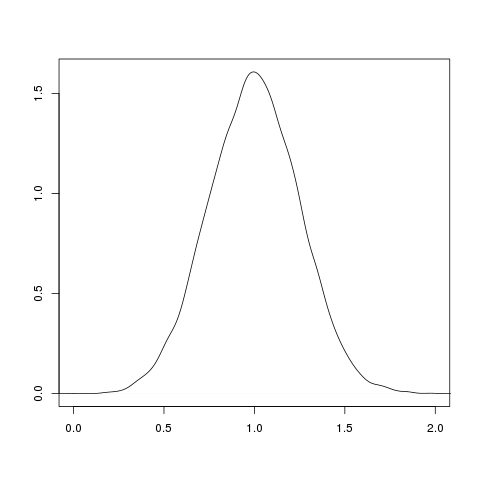

In [2]:
%%R
x<-rnorm(n=10000, mean=1, sd=.25)
plot(density(x), type='l', main='',xlim=c(0,2), ylab='', xlab='', )

Or plots of dots:

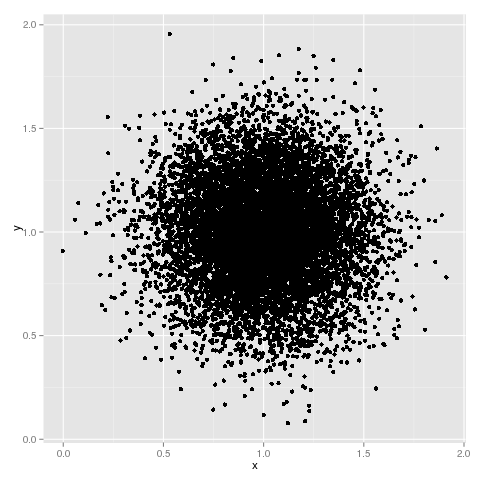

In [3]:
%%R
library(ggplot2)
x<-rnorm(n=10000, mean=1, sd=.25)
y<-rnorm(n=10000, mean=1, sd=.25)
qplot(x,y)

In [6]:
%%R
summary(lm(x ~ y))


Call:
lm(formula = x ~ y)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00594 -0.17205 -0.00087  0.17285  0.90693 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.01923    0.01057  96.440   <2e-16 ***
y           -0.01781    0.01027  -1.735   0.0828 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.256 on 9998 degrees of freedom
Multiple R-squared:  0.0003009,	Adjusted R-squared:  0.0002009 
F-statistic: 3.009 on 1 and 9998 DF,  p-value: 0.08284



To install the `R` kernel, follow the [instructions](https://github.com/IRkernel/IRkernel) for your operating system on GitHub.

Regardless of how you install `R`, you'll want to know where and how things are being installed. You can use the following commands to find out.

In [38]:
%%bash
which -a R

/usr/bin/R


In [35]:
%%R
.libPaths()

[1] "/home/cahern/R/x86_64-pc-linux-gnu-library/3.2"
[2] "/usr/local/lib/R/site-library"                 
[3] "/usr/lib/R/site-library"                       
[4] "/usr/lib/R/library"                            


In [19]:
%%R
R.home()

[1] "/usr/lib/R"


Now that we have `python` and `R` up and running, we'll wrap up with TeX.

# TeX

## Description

TeX is an open source, powerful, and flexible typesetting system that is the standard in many fields. The learning curve is steep relative to other word processing programs, but arguably pays off in terms of expressiveness and customizability.

## Installation

To install TeX you'll need to install the appropriate version of [TeXLive](https://www.tug.org/texlive/) for your system. To convert between TeX and many other formats you'll need [Pandoc](pandoc.org).

In [41]:
Image(url='http://pandoc.org/diagram.jpg')

Up until now, the installation instructions have been similar across platforms, this is where they diverge.

### Linux

This is where Linux really shines through, for Debian/Ubuntu you need one line. 

`sudo apt-get install texlive texmaker pandoc`

### Mac

* Install [XCode](https://developer.apple.com/xcode/downloads/) and [XCode command line tools](http://osxdaily.com/2014/02/12/install-command-line-tools-mac-os-x/)
* Install [MacTex](https://tug.org/mactex/) : download via torrent if possible, use [transmission](http://www.transmissionbt.com/)
* Install [Macports](https://www.macports.org/) : [texlive-latex-recommended](https://www.macports.org/ports.php?by=library&substr=texlive-latex-recommended), [texlive-latex-extra](https://trac.macports.org/browser/trunk/dports/tex/texlive-latex-extra/Portfile), [texlive-fonts-recommended](https://trac.macports.org/browser/trunk/dports/tex/texlive-fonts-recommended/Portfile)
* Install [TexMaker](http://www.xm1math.net/texmaker/) : LaTeX editor
* Install [Pandoc](http://pandoc.org/) : document converter, [older release](https://github.com/jgm/pandoc/tags) may be needed

### Windows

* Install [Miktex](http://miktex.org/download) : reasonable download size, installs more
* Install [TexMaker](http://www.xm1math.net/texmaker/) : LaTeX editor
* Install [Pandoc](http://pandoc.org/) : document converter, [older release](https://github.com/jgm/pandoc/tags) may be needed

# Summary 

At the end of following these instructions you should have the following:

* SciPy stack
* R and RStudio
* TeXLive and Pandoc

In [7]:
import IPython
import sys

In [8]:
print 'Python version: ', sys.version
print 'Platform: ', sys.platform
print 'IPython version: ', IPython.__version__

Python version:  2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 17:02:03) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Platform:  linux2
IPython version:  3.2.0
